## Predictive Health Assessment: Leveraging DHS Data for Targeted Interventions in Kenya

**Authors**: [Alpha Guya](mailto:alpha.guya@student.moringaschool.com), [Ben Ochoro](mailto:ben.ochoro@student.moringaschool.com), [Caleb Ochieng](mailto:caleb.ochieng@student.moringaschool.com), [Christine Mukiri](mailto:christine.mukiri@student.moringaschool.com), [Dominic Muli](mailto:dominic.muli@student.moringaschool.com), [Frank Mandele](mailto:frank.mandele@student.moringaschool.com), [Jacquiline Tulinye](mailto:jacquiline.tulinye@student.moringaschool.com) and [Lesley Wanjiku](mailto:lesley.wanjiku@student.moringaschool.com)

## 1.0) Project Overview

Our project focuses on using machine learning techniques and data sourced from the Demographic and Health Surveys (DHS) program to generate predictive models aimed at evaluating individual and household health risks in Kenya. By analyzing various set of demographic, socio-economic, and health-related indicators, we target to develop reliable predictive models capable of estimating the likelihood of malnutrition, disease prevalence, and various health risks within certain communities. The goal is to provide users such as public health officials with targeted insights. This will enable more effective allotment of resources and interventions. This proactive approach is geared to optimize the impact of health initiatives, allowing for the prioritization and customization of interventions to at risk populations, ultimately contributing to the improvement of health outcomes in Kenya.

### 1.1) Business Problem

Despite existing health interventions, Kenya encounters difficulties in effectively targeting resources and interventions. This will help to address individual and household health risks, including malnutrition, diseases, and other health concerns. This fault highlights the need for a predictive and targeted approach to allocate resources and interventions more effectively. Leveraging machine learning models built upon Demographic and Health Surveys (DHS) data, the project aims to develop predictive models capable of assessing the likelihood of malnutrition, disease prevalence, and health risks based on individual and household characteristics. By accurately identifying at-risk populations, this solution seeks to empower decision-makers and public health officials to allocate resources on need basis, ultimately increasing the impact of health interventions and improving overall health outcomes in Kenya.

### 1.2) Objectives


Based on the data provided by DHS(Demographic and Health Surveys) , some of the objectives include:

* To analyze trends in health indicators over time.

* To predict Health Risks based on individual and household characteristics. 

* To find the relationship between the most common diseases and the demographic.

*  To Build predictive models to estimate health outcomes based on various demographic and socio-economic factors.

*  To identify regional variations in health indicators.

* To Identify factors contributing to changes in health outcomes.

* To Conduct comprehensive feature engineering to extract relevant features from DHS data, considering demographic, socio-economic, and health-related variables.


### API Deployment and Usability

Deploy an accessible API interface for stakeholders to input data and receive health risk predictions based on the developed models.

### Recommendations and Conclusion
* Targeted Intervention Recommendations:

Utilize model predictions to generate targeted recommendations for health interventions and resource allocation in specific Kenyan communities.

* Impact Assessment and Validation:

Assess the real-world impact of model-guided interventions by monitoring and evaluating changes in health outcomes in targeted Kenyan populations.

### 1.3) Metric of Success

* Achieve a predictive accuracy of at least 90% on unseen validation data.
* Identify and utilize the top 10 most influential features contributing to the models' predictive power.
* Generate clear and interpretable explanations for at least 70% of model predictions.
* Create a prioritized list of actionable recommendations based on identified health risks for at least 100 of communities.
* Ensure an API uptime of at least 90% and gather feedback on usability for further improvements.
* Measure the effectiveness of interventions by observing changes in health indicators, aiming for improvements in at least 80% of targeted communities.

### 1.4) Data Relevance and Validation

The data available is relevant for the intended analysis and predictions

## 2.0) Understanding the Data

The data for this project is obtained from the [DHS Program website](https://dhsprogram.com/data/dataset/Kenya_Standard-DHS_2022.cfm?flag=0).
The encoding for this dataset is explained [here](./Recode7_DHS_10Sep2018_DHSG4.pdf).

### 2.1) Reading the Data

#### 2.1.1) Installations

In [1]:
# installations
# %pip install requests
# %pip install pyreadstat
# %pip install --upgrade openpyxl

#### 2.1.2) Importing Relevant Libraries

In [2]:
# importing necessary libraries
import requests, json
import urllib
import urllib.request
import urllib.error
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

#### 2.1.3) Reading the Data

Observation: we will work with

In [3]:
# Reading downloaded relevant data
malaria_df, meta = pyreadstat.read_sav("KEHR81FL - NEW.SAV")
malaria_df

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,SML16A$15,SML16A$16,SML16A$17,SML16A$18,SML16A$19,SML16A$20,SML16A$21,SML16A$22,SML16A$23,SML16A$24
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
meta

In [5]:
malaria_df.describe

<bound method NDFrame.describe of               HHID HV000   HV001  HV002  HV003   HV004     HV005  HV006  \
0            2   1   KE7     2.0    1.0    8.0     2.0  588318.0   11.0   
1            2   6   KE7     2.0    6.0    2.0     2.0  588318.0   11.0   
2            2  10   KE7     2.0   10.0    2.0     2.0  588318.0   11.0   
3            2  13   KE7     2.0   13.0    1.0     2.0  588318.0   11.0   
4            2  16   KE7     2.0   16.0    3.0     2.0  588318.0   11.0   
...            ...   ...     ...    ...    ...     ...       ...    ...   
7947      9186 155   KE7  9186.0  155.0    1.0  9186.0  454518.0   11.0   
7948      9186 161   KE7  9186.0  161.0    1.0  9186.0  454518.0   11.0   
7949      9186 166   KE7  9186.0  166.0    1.0  9186.0  454518.0   11.0   
7950      9186 170   KE7  9186.0  170.0    1.0  9186.0  454518.0   11.0   
7951      9186 175   KE7  9186.0  175.0    1.0  9186.0  454518.0   11.0   

       HV007   HV008  ...  SML16A$15  SML16A$16  SML16A$17  SML16

**Renaming columns in df**

In [6]:
malaria_df.columns

Index(['HHID', 'HV000', 'HV001', 'HV002', 'HV003', 'HV004', 'HV005', 'HV006',
       'HV007', 'HV008',
       ...
       'SML16A$15', 'SML16A$16', 'SML16A$17', 'SML16A$18', 'SML16A$19',
       'SML16A$20', 'SML16A$21', 'SML16A$22', 'SML16A$23', 'SML16A$24'],
      dtype='object', length=1955)

In [7]:
# Saving column names into an Excel file

# Getting the column names
column_names = malaria_df.columns

# Creating a DataFrame with a single column containing the column names
column_names_df = pd.DataFrame(column_names, columns=["Column Names"])

# Specifying the Excel file path
excel_file_path = 'malaria_column_names.xlsx'

# Writing the DataFrame to the Excel file
column_names_df.to_excel(excel_file_path, index=False)

In [8]:
# Converting column names to labels dictionary to a DataFrame
labels_df = pd.DataFrame(list(meta.column_names_to_labels.items()), columns=['Column Name', 'Label'])

# Saving the DataFrame to an Excel file
excel_file_path = 'malaria_column_names_to_labels.xlsx'
labels_df.to_excel(excel_file_path, index=False)

** Checking for missing values*

In [11]:
# Checking percentage of missing values
def missing_values_summary(df):
    """
    Generate a summary of missing values for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame containing columns with NaN values and their percentages
    """

    # Checking percentage of missing values
    nan_info = df.isna().sum()
    nan_percentage = (nan_info / len(df)) * 100

    # Creating a DataFrame with columns and their NaN percentages
    nan_df = pd.DataFrame({'Column': nan_info.index, 'NaN Count': nan_info.values, 'NaN Percentage': nan_percentage.values})

    # Filtering columns with NaN values
    columns_with_nan = nan_df[nan_df['NaN Count'] > 0]

    return columns_with_nan


# Calling the function on df_cleaned
result = missing_values_summary(malaria_df)
# result.tail(50)
result

,Column,NaN Count,NaN Percentage
13,HV011,7952,100.000000
21,HV019,7952,100.000000
28,HV026,7952,100.000000
32,HV031,7952,100.000000
33,HV032,7952,100.000000
...,...,...,...
1950,SML16A$20,7951,99.987425
1951,SML16A$21,7951,99.987425
1952,SML16A$22,7952,100.000000
1953,SML16A$23,7952,100.000000


**Calculating the columns with NaN values*

In [12]:
# Set the threshold percentage
# threshold_percentage = 0.6

# # Calculate the threshold for each column
# column_thresholds = threshold_percentage * len(malaria_df)

# # Drop columns based on the calculated threshold for each column
# df_cleaned = malaria_df.dropna(axis=1, thresh=column_thresholds)

# df_cleaned

In [13]:
# # Saving the entire DataFrame to an Excel file
# excel_file_path = 'cleaned_column_names.xlsx'
# df_cleaned.to_excel(excel_file_path, index=False)

In [16]:
#  Assuming df is your DataFrame
# Define your naming format using a regex pattern

# childs_age_in_months_country_specific_hml16a_1
# cam_pattern = r'^SML16A\$[0-9]{2}$'
# # final blood smear test
# fbs_pattern = r'^HML32\$([0][1-9]|[1][0-9])$'

# # Use filter to select columns based on the naming format
# selected_columns = malaria_df.filter(regex=cam_pattern)
# selected_columns_01 = malaria_df.filter(regex=fbs_pattern)

# # Create a new column 'most_common_result' with the most common value across the selected columns
# malaria_df[selected_columns.columns]=malaria_df[selected_columns.columns].astype("object")
# malaria_df[selected_columns_01.columns]=malaria_df[selected_columns_01.columns].astype("object")

# malaria_df['SML16A'] = malaria_df[selected_columns.columns].mean(axis=1)
# malaria_df['HML32'] = malaria_df[selected_columns_01.columns].mean(axis=1)

# Display the updated DataFrame
# print(malaria_df['SML16A'])

Collapse the repeated data-columns

In [17]:
def collapse_columns(df, prefix, suffixes, combined_column):
    # Extracting columns with the specified prefix and suffixes
    relevant_columns = [col for col in df.columns if col.startswith(prefix) and any(col.endswith(suffix) for suffix in suffixes)]

    # Creating a new column 'combined_column' with the highest value for each row
    df[combined_column] = df[relevant_columns].max(axis=1)

    # Dropping the original columns
    df.drop(relevant_columns, axis=1, inplace=True)

    return df

def filter_and_exclude_prefix(df, prefix, exclude_first_n=6):
    filtered_columns = [col for col in df.columns if col.startswith(prefix)]
    modified_columns = [col[exclude_first_n:] for col in filtered_columns]
    return modified_columns

In [18]:
# df_2_suffixes = filter_and_exclude_prefix(malaria_df, 'HML32$')

# df_2 = collapse_columns(malaria_df, 'HML32$', df_2_suffixes, 'HML32_combined')

# print(df_2['HML32_combined'].value_counts())

HML32_combined
0.0    4160
1.0     595
Name: count, dtype: int64


In [24]:
columns = ['HV120',
           'HC53', 'HC55','HC56','HC57',
           'SB115A','SB115B','SB115C', 'SB115D','SB115E','SB115F','SB115G','SB115H', 'SB119','SB122',
           'HML5','HML6','HML10', 'HML11','HML12', 'HML18', 'HML19',
           'HML32','HML32A', 'HML32B', 'HML32C','HML32D', 'HML32E', 'HML32F', 'HML32G', 'HML33', 'HML34', 'HML35']

for i in columns:
    df_2_suffixes = filter_and_exclude_prefix(malaria_df, f'{i}$')
    # print(df_2_suffixes)
    collapse_columns(malaria_df, f'{i}$', df_2_suffixes, f'{i}_combined')
    
    # print(malaria_df[f'{i}_combined'].value_counts())


In [25]:
malaria_df

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,...,HML32A_combined,HML32B_combined,HML32C_combined,HML32D_combined,HML32E_combined,HML32F_combined,HML32G_combined,HML33_combined,HML34_combined,HML35_combined
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,X6J1O,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,W1J4L,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,X2H6N,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,W6C0F,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,V1N2M,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,T2M3L,0.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,O8Z1X,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,P2O4K,1.0


* Converting the coded column headed to text labels

In [29]:
# Converting Coded column names into readable column names

# Loading the Excel file with the column names into a Pandas DataFrame
excel_file_path = 'malaria_column_names_dictionary.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name='Sheet1')

# Displaying the original DataFrame with the column headers
print("Original Excel DataFrame:")
print(df_excel)

# Replacing the column headers using a for loop
for old_header, new_header in zip(malaria_df.columns, df_excel['Label Names']):
    malaria_df.rename(columns={old_header: new_header}, inplace=True)

# Displaying the DataFrame with the updated column headers
malaria_df

Original Excel DataFrame:
         Column Names                 Label Names  \
0                HHID                household_id   
1               HV000                country_code   
2               HV001             cluster_number    
3               HV002            household_number   
4               HV003  respondent's_ line_number    
...               ...                         ...   
1984  HML32C_combined               ovale_present   
1985  HML32D_combined               vivax_present   
1986  HML32E_combined                  cs_present   
1987  HML32F_combined              presence_of_cs   
1988  HML32G_combined         na_presence_of_cs_g   

                                            Description Unnamed: 3 Unnamed: 4  
0                                   Case Identification        NaN        NaN  
1                                Country code and phase        NaN        NaN  
2                                        Cluster number        NaN        NaN  
3                

,household_id,country_code,cluster_number,household_number,respondent's_ line_number,area_unit,sample_weight,month_of_the_household_interview,year_of_the_household_interview,month_date_of_household_interview,...,line_number_of_person_slept_in_net_d_1,line_number_of_person_slept_in_net_d_2,line_number_of_person_slept_in_net_d_3,line_number_of_person_slept_in_net_d_4,line_number_of_person_slept_in_net_d_5,line_number_of_person_slept_in_net_d_6,line_number_of_person_slept_in_net_d_7,line_number_of_person_slept_in_net_e_1,line_number_of_person_slept_in_net_e_2,line_number_of_person_slept_in_net_e_3
0,2 1,KE7,2.0,1.0,8.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,X6J1O,0.0
1,2 6,KE7,2.0,6.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,W1J4L,0.0
2,2 10,KE7,2.0,10.0,2.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,X2H6N,1.0
3,2 13,KE7,2.0,13.0,1.0,2.0,588318.0,11.0,2020.0,1451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN
4,2 16,KE7,2.0,16.0,3.0,2.0,588318.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,W6C0F,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,9186 155,KE7,9186.0,155.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,V1N2M,1.0
7948,9186 161,KE7,9186.0,161.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,T2M3L,0.0
7949,9186 166,KE7,9186.0,166.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,O8Z1X,0.0
7950,9186 170,KE7,9186.0,170.0,1.0,9186.0,454518.0,11.0,2020.0,1451.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,P2O4K,1.0


In [30]:
# Variable label dictionary
variable_label = meta.variable_value_labels

In [31]:
def get_variable_label(column_label, df_excel, variable_labels):
    '''Function to get variable label'''
    # Looking up the column label
    matching_row = df_excel[df_excel['Label Names'] == column_label]

    # Getting the corresponding column name
    corresponding_column_name = matching_row['Column Names'].iloc[0] if not matching_row.empty else None

    # Getting variable label names
    variable_label = variable_labels.get(corresponding_column_name, None)

    return variable_label

In [32]:
# Calling the function to get variable labels
variable_label_has_net = get_variable_label('has_mosquito_net',df_excel, variable_label)

### EDA

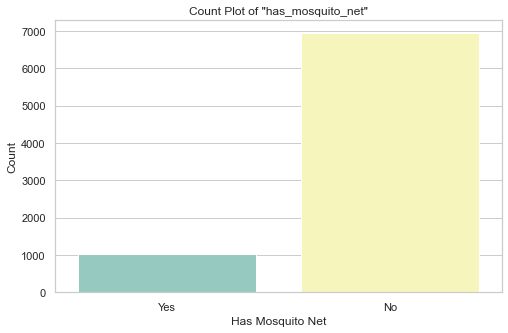

In [35]:
# Household has a mosquito net

# Mapping the variable labels to the column
household_has_mosquito_net = malaria_df['has_mosquito_net'].map(variable_label_has_net).reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='has_mosquito_net', data=household_has_mosquito_net, palette="Set3")
plt.title('Count Plot of "has_mosquito_net"')
plt.xlabel('Has Mosquito Net')
plt.ylabel('Count')
plt.show()